# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
ride_data_to_load = "../PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "../PyBer_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
ride_count_df = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_df.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
driver_count_df = pyber_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_df.head()


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
fare_count_df = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_count_df.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride= pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver= pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_driver.head()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_ride_summary_df = pd.DataFrame({
    "Total Rides": ride_count_df,
    "Total Drivers": driver_count_df,
    "Total Fares": fare_count_df,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})

pyber_ride_summary_df

Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
type                                                                       
Rural             125            537      4327.93              34.623440   
Suburban          625           8570     19356.33              30.970128   
Urban            1625          59602     39854.38              24.525772   

          Average Fare per Driver  
type                               
Rural                    8.059460  
Suburban                 2.258615  
Urban                    0.668675

In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_ride_summary_df.index.name = None

In [13]:
#  8. Format the columns.


In [14]:

pyber_ride_summary_df = pd.DataFrame({
    "Total Rides": ride_count_df,
    "Total Drivers": driver_count_df,
    "Total Fares": fare_count_df.map("${:,.2f}".format),
    "Average Fare per Ride": average_fare_per_ride.map("${:,.2f}".format),
    "Average Fare per Driver": average_fare_per_driver.map("${:,.2f}".format)})

pyber_ride_summary_df

Total Rides  Total Drivers Total Fares Average Fare per Ride  \
Rural             125            537   $4,327.93                $34.62   
Suburban          625           8570  $19,356.33                $30.97   
Urban            1625          59602  $39,854.38                $24.53   

         Average Fare per Driver  
Rural                      $8.06  
Suburban                   $2.26  
Urban                      $0.67

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

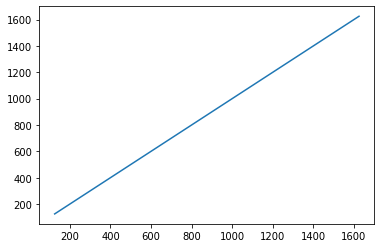

In [15]:
# 1. Read the merged DataFrame
x_axis= pyber_data_df.groupby(["type"]).count()["ride_id"]
y_axis= pyber_data_df.groupby(["type"]).count()["fare"]
plt.plot(x_axis, y_axis)
plt.show()

In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

graph_x_df= pyber_data_df.groupby(["type"]).sum()["fare"]
graph_y_df= pyber_data_df.groupby(["date"]).sum()["fare"]

In [25]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function
pyber_data_df.reset_index()


index                city                 date   fare        ride_id  \
0         0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1         1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2         2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3         3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4         4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...     ...                 ...                  ...    ...            ...   
2370   2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371   2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372   2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373   2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374   2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4               46  Urban  
...            ...    ...  
2370             6  Rural  
2371             2  Rural  
2372             1  Rural  
2373             4  Rural  
2374             1  Rural  

[2375 rows x 7 columns]

In [27]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot=pyber_data_df.pivot(index="date", columns= "type", values= "fare")
pyber_pivot.head(10)

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
2019-01-01 09:45:36  43.69       NaN    NaN
2019-01-01 12:32:48    NaN     25.56    NaN
2019-01-01 14:40:14    NaN       NaN   5.42
2019-01-01 14:42:25    NaN       NaN  12.31
2019-01-01 14:52:06    NaN     31.15    NaN

In [36]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_pivot_date_df=pyber_pivot.loc['2019-01-01':'2019-04-29']

In [37]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

pyber_pivot_date_df.index = pd.to_datetime(pyber_pivot_date_df.index)


In [38]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_date_df.info

<bound method DataFrame.info of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-29 20:54:19    NaN       NaN  28.41
2019-04-29 21:20:41    NaN       NaN  13.59
2019-04-29 22:08:22    NaN     25.75    NaN
2019-04-29 23:05:04    NaN       NaN  14.59
2019-04-29 23:10:18    NaN     29.39    NaN

[2218 rows x 3 columns]>

In [52]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = pyber_pivot_date_df.resample('W').sum()
weekly_fares_df.head(10)

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93

<AxesSubplot:xlabel='date'>

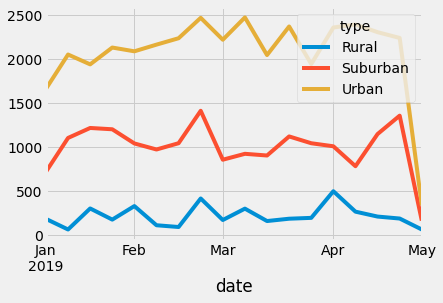

In [65]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fares_df.plot()


In [70]:
weekly_fares_df.savefig("../PyBer_Analysis/analysis/Pyber_fare_summary.PNG")

AttributeError: 'DataFrame' object has no attribute 'savefig'